<a href="https://colab.research.google.com/github/bongkyunSON/Deep_Leaning/blob/main/Prophet_case6_230104.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Crime rate forecasting Using FbProphet


In [12]:
# install relevant, necessary packages
!pip install pandas
!pip install numpy
!pip install prophet
!pip install plotnine

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [13]:
# import necessary libraries
import numpy as np # linear algebra
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly
from prophet.diagnostics import cross_validation
from prophet.diagnostics import performance_metrics
import warnings
warnings.filterwarnings('ignore')  # Hide warnings
warnings.simplefilter(action = "ignore", category = RuntimeWarning)
import datetime as dt
import pandas as pd
pd.core.common.is_list_like = pd.api.types.is_list_like
import pandas_datareader.data as web
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
import pandas as pd
from plotnine import *
import io
# we'll use the statistics package to conduct some predictive analytics
import statistics as st
%matplotlib inline
import matplotlib.dates as mdates
from pandas import DataFrame
from pandas import to_datetime
from statsmodels.tsa.stattools import kpss
from statsmodels.tsa.stattools import adfuller
from  sklearn.metrics import mean_absolute_error

In [14]:
# read the datafile as a panda dataframe
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DeepLearning/prophet_강의/data/Chicago_Crimes_2001_to_2004.csv', on_bad_lines='skip')

In [15]:
df

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,879,4786321,HM399414,01/01/2004 12:01:00 AM,082XX S COLES AVE,0840,THEFT,FINANCIAL ID THEFT: OVER $300,RESIDENCE,False,...,7.0,46.0,06,NaN,NaN,2004.0,08/17/2015 03:03:40 PM,NaN,NaN,NaN
1,2544,4676906,HM278933,03/01/2003 12:00:00 AM,004XX W 42ND PL,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,...,11.0,61.0,26,1173974.0,1876757.0,2003.0,04/15/2016 08:55:02 AM,41.817229,-87.637328,"(41.817229156, -87.637328162)"
2,2919,4789749,HM402220,06/20/2004 11:00:00 AM,025XX N KIMBALL AVE,1752,OFFENSE INVOLVING CHILDREN,AGG CRIM SEX ABUSE FAM MEMBER,RESIDENCE,False,...,35.0,22.0,20,NaN,NaN,2004.0,08/17/2015 03:03:40 PM,NaN,NaN,NaN
3,2927,4789765,HM402058,12/30/2004 08:00:00 PM,045XX W MONTANA ST,0840,THEFT,FINANCIAL ID THEFT: OVER $300,OTHER,False,...,31.0,20.0,06,NaN,NaN,2004.0,08/17/2015 03:03:40 PM,NaN,NaN,NaN
4,3302,4677901,HM275615,05/01/2003 01:00:00 AM,111XX S NORMAL AVE,0841,THEFT,FINANCIAL ID THEFT:$300 &UNDER,RESIDENCE,False,...,34.0,49.0,06,1174948.0,1831051.0,2003.0,04/15/2016 08:55:02 AM,41.691785,-87.635116,"(41.691784636, -87.635115968)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1923510,6252586,4781176,HM386461,04/01/2001 09:00:00 AM,023XX N LATROBE AVE,0841,THEFT,FINANCIAL ID THEFT:$300 &UNDER,ALLEY,False,...,37.0,19.0,06,1140960.0,1915056.0,2001.0,06/14/2006 04:14:16 AM,41.922997,-87.757492,"(41.922996623, -87.757491503)"
1923511,6252606,4671197,HM270817,09/01/2003 12:01:00 AM,045XX N MOBILE AVE,0840,THEFT,FINANCIAL ID THEFT: OVER $300,APARTMENT,False,...,38.0,15.0,06,1133528.0,1929634.0,2003.0,04/15/2016 08:55:02 AM,41.963134,-87.784457,"(41.963133955, -87.784456675)"
1923512,6252728,4671380,HM269330,08/01/2002 09:00:00 AM,020XX W 82ND PL,0840,THEFT,FINANCIAL ID THEFT: OVER $300,RESIDENCE,False,...,18.0,71.0,06,1164056.0,1849944.0,2002.0,04/15/2016 08:55:02 AM,41.743865,-87.674464,"(41.743865444, -87.674463733)"
1923513,6253372,4782588,HM394550,06/04/2001 12:01:00 AM,087XX S MUSKEGON AVE,0610,BURGLARY,FORCIBLE ENTRY,OTHER,False,...,10.0,46.0,05,1196570.0,1847474.0,2001.0,07/05/2006 04:01:36 AM,41.736343,-87.555413,"(41.736342659, -87.555413094)"


In [16]:
# We have many columns that we are not going to use. Let's drop those first
df.drop(['Unnamed: 0', 'ID', 'Case Number', 'IUCR', 'X Coordinate',  'Y Coordinate','Updated On','Year', 'FBI Code', 'Beat','Ward','Community Area','Location', 'District', 'Latitude', 'Longitude'],
axis = 1, inplace=True)

In [17]:
df

,Date,Block,Primary Type,Description,Location Description,Arrest,Domestic
0,01/01/2004 12:01:00 AM,082XX S COLES AVE,THEFT,FINANCIAL ID THEFT: OVER $300,RESIDENCE,False,False
1,03/01/2003 12:00:00 AM,004XX W 42ND PL,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,True
2,06/20/2004 11:00:00 AM,025XX N KIMBALL AVE,OFFENSE INVOLVING CHILDREN,AGG CRIM SEX ABUSE FAM MEMBER,RESIDENCE,False,False
3,12/30/2004 08:00:00 PM,045XX W MONTANA ST,THEFT,FINANCIAL ID THEFT: OVER $300,OTHER,False,False
4,05/01/2003 01:00:00 AM,111XX S NORMAL AVE,THEFT,FINANCIAL ID THEFT:$300 &UNDER,RESIDENCE,False,False
...,...,...,...,...,...,...,...
1923510,04/01/2001 09:00:00 AM,023XX N LATROBE AVE,THEFT,FINANCIAL ID THEFT:$300 &UNDER,ALLEY,False,False
1923511,09/01/2003 12:01:00 AM,045XX N MOBILE AVE,THEFT,FINANCIAL ID THEFT: OVER $300,APARTMENT,False,False
1923512,08/01/2002 09:00:00 AM,020XX W 82ND PL,THEFT,FINANCIAL ID THEFT: OVER $300,RESIDENCE,False,False
1923513,06/04/2001 12:01:00 AM,087XX S MUSKEGON AVE,BURGLARY,FORCIBLE ENTRY,OTHER,False,False


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1923515 entries, 0 to 1923514
Data columns (total 7 columns):
 #   Column                Dtype 
---  ------                ----- 
 0   Date                  object
 1   Block                 object
 2   Primary Type          object
 3   Description           object
 4   Location Description  object
 5   Arrest                bool  
 6   Domestic              bool  
dtypes: bool(2), object(5)
memory usage: 77.0+ MB


In [19]:
# let's convert the date column to the datetime format that is required by Prophet
df2 = df.copy()
df2.Date = pd.to_datetime(df2.Date, format = '%m/%d/%Y %I:%M:%S %p')
df2.index = pd.DatetimeIndex(df2.Date)
df2.drop('Date', inplace = True, axis = 1)

In [20]:
df2

,Block,Primary Type,Description,Location Description,Arrest,Domestic
Date,,,,,,
2004-01-01 00:01:00,082XX S COLES AVE,THEFT,FINANCIAL ID THEFT: OVER $300,RESIDENCE,False,False
2003-03-01 00:00:00,004XX W 42ND PL,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,True
2004-06-20 11:00:00,025XX N KIMBALL AVE,OFFENSE INVOLVING CHILDREN,AGG CRIM SEX ABUSE FAM MEMBER,RESIDENCE,False,False
2004-12-30 20:00:00,045XX W MONTANA ST,THEFT,FINANCIAL ID THEFT: OVER $300,OTHER,False,False
2003-05-01 01:00:00,111XX S NORMAL AVE,THEFT,FINANCIAL ID THEFT:$300 &UNDER,RESIDENCE,False,False
...,...,...,...,...,...,...
2001-04-01 09:00:00,023XX N LATROBE AVE,THEFT,FINANCIAL ID THEFT:$300 &UNDER,ALLEY,False,False
2003-09-01 00:01:00,045XX N MOBILE AVE,THEFT,FINANCIAL ID THEFT: OVER $300,APARTMENT,False,False
2002-08-01 09:00:00,020XX W 82ND PL,THEFT,FINANCIAL ID THEFT: OVER $300,RESIDENCE,False,False


Now, let's look at the crime distribution on a monthly level

Text(0, 0.5, 'Num of crimes')

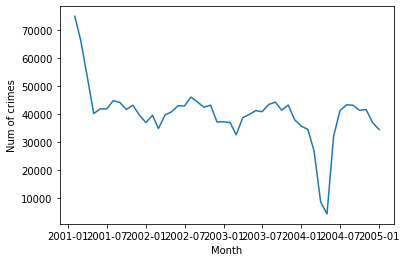

In [21]:
plt.plot(df2.resample('M').size())
plt.xlabel('Month')
plt.ylabel('Num of crimes')

Text(0, 0.5, 'Num of crimes')

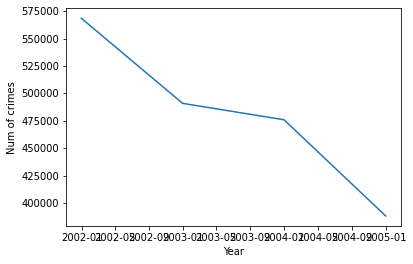

In [22]:
plt.plot(df2.resample('Y').size())
plt.xlabel('Year')
plt.ylabel('Num of crimes')

We clearly see that overall there is a discending trend. But, while there is a monthly seasonality, there is no clear yearly seasonality. We need these information for modeling with Prophet.

Next, let's prepare our dataset for feeding into prophet. This requires a speific format. We need only two colums with 'ds' as our date column, and 'y' as the variable that we want to predict. 

We'll do it as a monthly data.

In [23]:
# prepare the data
df3 = df2.resample('M').size().reset_index() # resample it to monthly data
df3.columns = ['Date', 'Monthly Crime Count']
df3 = df3.rename(columns = {'Date': 'ds', 'Monthly Crime Count': 'y'})

In [24]:
df3

,ds,y
0,2001-01-31,74995
1,2001-02-28,66288
2,2001-03-31,53122
3,2001-04-30,40166
4,2001-05-31,41876
5,2001-06-30,41823
6,2001-07-31,44801
7,2001-08-31,44115
8,2001-09-30,41602
9,2001-10-31,43131


In [25]:
## function to Plot the prepared stock data

def _fig_plot(df, X, Y):
  ''' Function plots the data. requires to provide dataframe in the
  format of date as ds, observation as y, Preset other variables e.g., axis name
  '''
  df.plot(x = X, y = Y, figsize=Figsize, label = Label)
  plt.xlabel(xAxisLabel, fontsize = 16)
  plt.ylabel(yAxisLabel, fontsize = 16)
  plt.legend()
  plt.title(Title, fontsize = 20)
  ax = plt.gca().get_xaxis()

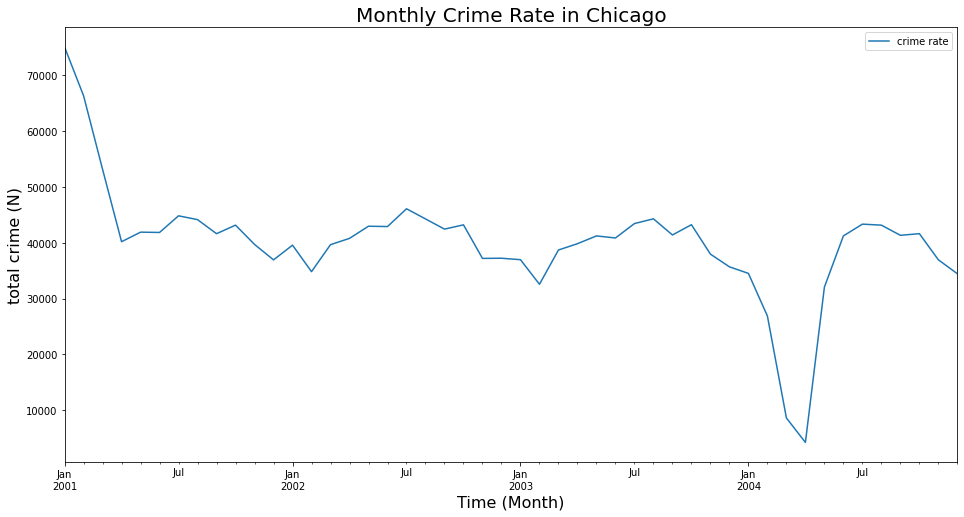

In [26]:
# plot the new dataframe to check back
X = 'ds'
Y = 'y'
Label = "crime rate"
Figsize = (16,8)
Title = "Monthly Crime Rate in Chicago"
xAxisLabel = 'Time (Month)'
yAxisLabel = 'total crime (N)'
_fig_plot(df3, X, Y)

In [27]:
# we can either input the full dataset and predict y in the future 
# or can split our dataset to train test. Here we continue with full data
train = df3.copy()

In [28]:
# because we have monthly seasonality, we need to add that to our model prediction
prophet = Prophet(daily_seasonality=True,
                  growth='linear', 
                  changepoints=None, 
                  n_changepoints=25, 
                  changepoint_range=0.8, 
                  yearly_seasonality=False, 
                  weekly_seasonality='auto', 
                  holidays=None, 
                  seasonality_mode='additive', 
                  seasonality_prior_scale=10, 
                  holidays_prior_scale=10, 
                  changepoint_prior_scale=0.05, 
                  mcmc_samples=0, 
                  interval_width=0.9, 
                  uncertainty_samples=1000, 
                  stan_backend=None)

# let's add monthly and quarterly seasonality to model better
prophet.add_seasonality(name='monthly', period=30.5, fourier_order=10)
prophet.add_seasonality(name='quarterly', period=91.5, fourier_order=10)


prophet.fit(train)

# create a future data frame 
future = prophet.make_future_dataframe(periods=12, freq = 'MS')
forecast = prophet.predict(future)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpg_bn82p1/r63j06pr.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpg_bn82p1/1hgx3u10.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=55523', 'data', 'file=/tmp/tmpg_bn82p1/r63j06pr.json', 'init=/tmp/tmpg_bn82p1/1hgx3u10.json', 'output', 'file=/tmp/tmpg_bn82p1/prophet_modelzs4ywjay/prophet_model-20230104144549.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
14:45:49 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:45:50 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Printing outputs from Prophet prediction...
           ds          yhat    yhat_lower    yhat_upper
0 2001-01-31  74934.792258  64497.397549  85874.501066
1 2001-02-28  49530.915588  38636.286765  60748.983396
2 2001-03-31  46576.284558  34966.800804  57999.015825
3 2001-04-30  44136.193477  33156.623407  55121.541715
4 2001-05-31  47774.483794  36514.526356  59176.530387


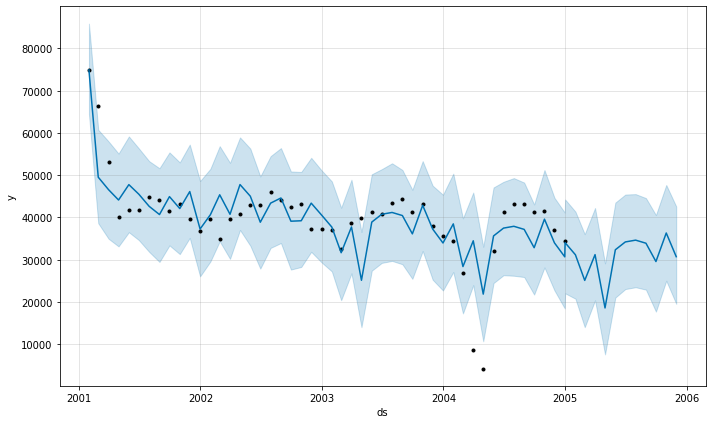

In [29]:
# summarize the forecast
print('Printing outputs from Prophet prediction...\n', forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head())
# plot forecast
prophet.plot(forecast)
plt.show()

In [30]:
# Python
plot_plotly(prophet, forecast)

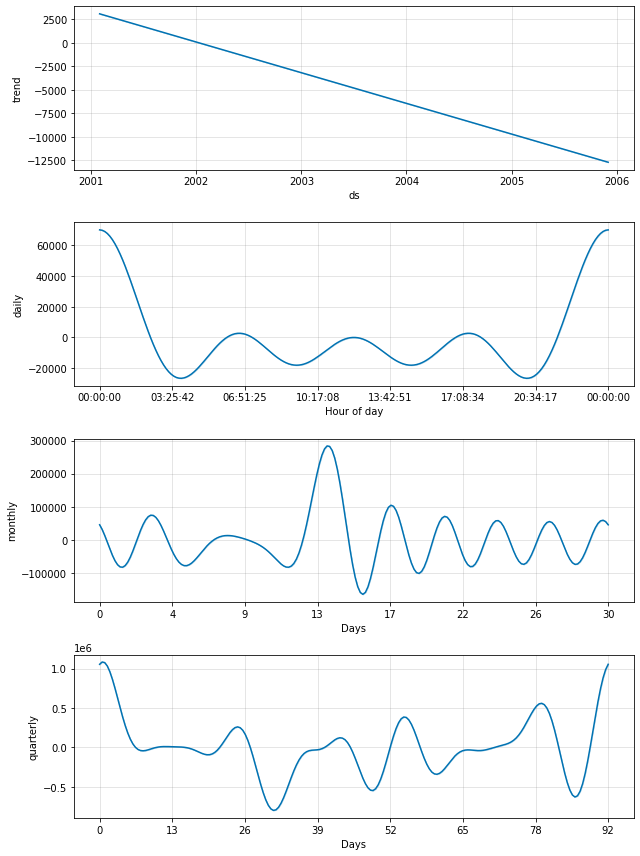

In [31]:
# plot the components of forcasted series
fig2 = prophet.plot_components(forecast)
plt.show()

In [32]:
firstdate = forecast['ds'].iloc[0]
lastdate = forecast['ds'].iloc[-1]
print('First and last date in your date column are: ', firstdate, lastdate)

First and last date in your date column are:  2001-01-31 00:00:00 2005-12-01 00:00:00


In [36]:
# use built in fbprophet evaluation function and metrix
# Because our time unit is month, we need to take a different approach for validation check
# first, define a cutoff range, leaving some initial months for training
# We are doing cross validation with a forecast horizon (frequency of prediction) of 3 months, 
# starting with 4 years of training data and then moving forward with a period of 1 month.
cutoffs = pd.date_range(start='2002-01-01', end='2003-06-30', freq='1MS')
evaluation_model = cross_validation(prophet, horizon='30 days', cutoffs=cutoffs)

  0%|          | 0/18 [00:00<?, ?it/s]

INFO:prophet:n_changepoints greater than number of observations. Using 8.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpg_bn82p1/gnabwxuj.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpg_bn82p1/6ipwg7n4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=99925', 'data', 'file=/tmp/tmpg_bn82p1/gnabwxuj.json', 'init=/tmp/tmpg_bn82p1/6ipwg7n4.json', 'output', 'file=/tmp/tmpg_bn82p1/prophet_modelntmi1znt/prophet_model-20230104145055.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
14:50:55 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:50:56 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:n_changepoints greater than number of observations. Using 9.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpg_bn82p1/yhdkqgcm.json
DEBUG:cmdstanpy:input tempfile:

In [37]:
evaluation_metrix = performance_metrics(evaluation_model)
evaluation_metrix.head(5)

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,27 days,1.045943e+10,102271.345942,100627.551274,2.972869,2.972869,1.189215,0.0
1,29 days,3.338320e+09,57778.197775,43758.124142,1.067045,0.833204,0.779593,0.0
2,30 days,5.777856e+08,24037.171240,19287.977429,0.465314,0.461853,0.585954,0.2


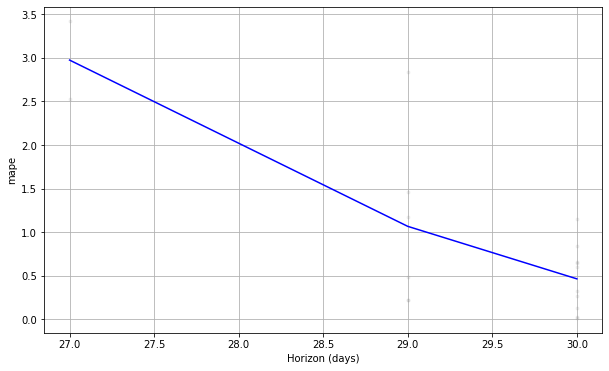

In [38]:
#Cross validation performance metrics can be visualized with plot_cross_validation_metric, here shown for MAPE. 
# Dots show the absolute percent error for each prediction in df_cv.
from prophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(evaluation_model, metric='mape')